<a href="https://colab.research.google.com/github/ArekPloska/NN/blob/main/Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=25000, n_classes=2, n_features=50, n_informative=50, n_redundant=0)

In [3]:
X.shape, y.shape

((25000, 50), (25000,))

In [4]:
from tensorflow import keras

In [6]:
model = keras.Sequential()
model.add(keras.layers.Input(X.shape[1]))
model.add(keras.layers.Dense(64, activation='tanh'))
model.add(keras.layers.Dense(16, activation='tanh'))
model.add(keras.layers.Dense(8, activation='tanh'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3264      
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 4,449
Trainable params: 4,449
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_sgd = keras.models.clone_model(model)
model_sgd_momentum = keras.models.clone_model(model)
model_adam = keras.models.clone_model(model)

In [11]:
model_sgd.compile(loss='mse', optimizer='sgd')
model_sgd_history = model_sgd.fit(X, y, epochs=100)

Epoch 1/100
782/782 [==============================] - 1s 945us/step - loss: 0.2028
Epoch 2/100
782/782 [==============================] - 1s 931us/step - loss: 0.1353
Epoch 3/100
782/782 [==============================] - 1s 947us/step - loss: 0.1142
Epoch 4/100
782/782 [==============================] - 1s 943us/step - loss: 0.1058
Epoch 5/100
782/782 [==============================] - 1s 920us/step - loss: 0.1008
Epoch 6/100
782/782 [==============================] - 1s 914us/step - loss: 0.0969
Epoch 7/100
782/782 [==============================] - 1s 897us/step - loss: 0.0935
Epoch 8/100
782/782 [==============================] - 1s 931us/step - loss: 0.0904
Epoch 9/100
782/782 [==============================] - 1s 896us/step - loss: 0.0872
Epoch 10/100
782/782 [==============================] - 1s 908us/step - loss: 0.0841
Epoch 11/100
782/782 [==============================] - 1s 937us/step - loss: 0.0810
Epoch 12/100
782/782 [==============================] - 1s 913us/step - lo

In [13]:
model_sgd_momentum.compile(loss='mse', optimizer=keras.optimizers.SGD(momentum=0.9))
model_sgd_momentum_history = model_sgd_momentum.fit(X, y, epochs=100)

Epoch 1/100
782/782 [==============================] - 1s 986us/step - loss: 0.1138
Epoch 2/100
782/782 [==============================] - 1s 950us/step - loss: 0.0641
Epoch 3/100
782/782 [==============================] - 1s 977us/step - loss: 0.0454
Epoch 4/100
782/782 [==============================] - 1s 950us/step - loss: 0.0335
Epoch 5/100
782/782 [==============================] - 1s 940us/step - loss: 0.0263
Epoch 6/100
782/782 [==============================] - 1s 933us/step - loss: 0.0214
Epoch 7/100
782/782 [==============================] - 1s 954us/step - loss: 0.0186
Epoch 8/100
782/782 [==============================] - 1s 969us/step - loss: 0.0156
Epoch 9/100
782/782 [==============================] - 1s 935us/step - loss: 0.0134
Epoch 10/100
782/782 [==============================] - 1s 937us/step - loss: 0.0118
Epoch 11/100
782/782 [==============================] - 1s 935us/step - loss: 0.0103
Epoch 12/100
782/782 [==============================] - 1s 963us/step - lo

In [23]:
model_adam.compile(loss='mse', optimizer=keras.optimizers.Adam())
model_adam_history = model_adam.fit(X, y, epochs=100, verbose=0)

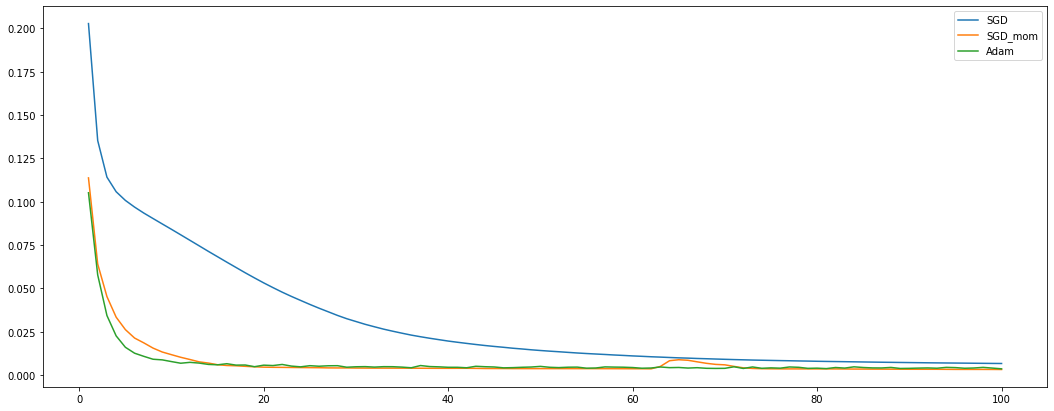

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 7))
plt.plot(range(1,101), model_sgd_history.history['loss'], label='SGD')
plt.plot(range(1,101), model_sgd_momentum_history.history['loss'], label='SGD_mom')
plt.plot(range(1,101), model_adam_history.history['loss'], label='Adam')
plt.legend()
plt.show()

In [29]:
min(model_adam_history.history['loss']), min(model_sgd_history.history['loss']), min(model_sgd_momentum_history.history['loss'])

(0.0036839968524873257, 0.006750817876309156, 0.0032859966158866882)